##### Version 0.1 -- Январь 2018

# Диполь

Добро пожаловать на третье занятие курса *AeroPython*! На прошлых двух занятиях мы рассмотрели несколько интересных потенциальных течений при помощи блокнотов [Источник и сток](01_Lesson01_sourceSink.ipynb) и [Источник и сток в равномерном потоке](02_Lesson02_sourceSinkFreestream.ipynb).

Вспомните систему из источника и стока, а затем представьте, что вы смотрите на картину течения из очень удаленной точки. С такой точки зрения линии тока между источником и стоком будут очень короткими. А остальные линии станут казаться двумя наборами окружностей, соприкасающихся в начале координат. Если удалиться настолько, что расстояние между источником и стоком приблизится к нулю, то получится конфигурация под названием *диполь*.

Давайте посмотрим, как это выглядит. Начнем с того, что загрузим наши любимые библиотеки.

In [1]:
import math
import numpy
from matplotlib import pyplot
# помещаем рисунки в блокнот
%matplotlib inline

В предыдущем блокноте мы убедились, что пара источник-сток можно использовать для воспроизведения обтекания тела особенной формы, а именно, овала Рэнкина. А в этом — превратим такую пару в диполь.

Во-первых, рассмотрим источник интенсивности $\sigma$ в точке $\left(-\frac{l}{2},0\right)$ и сток противоположной по знаку интенсивности, расположенной в $\left(\frac{l}{2},0\right)$. Вот эскиз, чтобы помочь вам представить картину:

<center>![image](files/resources/doubletSketch1.png)</center>

Функция тока пары источник-сток в точке $\text{P}\left(x,y\right)$ равна

$$\psi\left(x,y\right) = \frac{\sigma}{2\pi}\left(\theta_1-\theta_2\right) = -\frac{\sigma}{2\pi}\Delta\theta$$

Пусть расстояние $l$ между особенностями стремится к нулю, в то время как интенсивность возрастает так, чтобы произведение $\sigma l$ оставалось постоянным. В пределе получится *диполь* с интенсивностью $\kappa = \sigma l$.

Функция тока диполя в точке $\text{P}\left(x,y\right)$ равна

$$\psi\left(x,y\right) = \lim \limits_{l \to 0} \left(-\frac{\sigma}{2\pi}d\theta\right) \quad \text{and} \quad \sigma l = \text{constant}$$

<center>![image](files/resources/doubletSketch2.png)</center>

Рассматривая случай бесконечно малого $d\theta$, на основании схемы, приведенной выше, можно вывести:

$$a = l\sin\theta$$

$$b = r-l\cos\theta$$

$$d\theta = \frac{a}{b} = \frac{l\sin\theta}{r-l\cos\theta}$$

И тогда функция тока будет иметь вид

$$\psi\left(r,\theta\right) = \lim \limits_{l \to 0} \left(-\frac{\sigma l}{2\pi}\frac{\sin\theta}{r-l\cos\theta}\right) \quad \text{and} \quad \sigma l = \text{constant}$$

то есть

$$\psi\left(r,\theta\right) = -\frac{\kappa}{2\pi}\frac{\sin\theta}{r}$$

В декартовых координатах, диполь, расположенный в начале координат имеет функцию тока

$$\psi\left(x,y\right) = -\frac{\kappa}{2\pi}\frac{y}{x^2+y^2}$$

из которой можно получить выражения для компонент вектора скорости

$$u\left(x,y\right) = \frac{\partial\psi}{\partial y} = -\frac{\kappa}{2\pi}\frac{x^2-y^2}{\left(x^2+y^2\right)^2}$$

$$v\left(x,y\right) = -\frac{\partial\psi}{\partial x} = -\frac{\kappa}{2\pi}\frac{2xy}{\left(x^2+y^2\right)^2}$$

С математикой мы разделались, пора запрограммировать получившиеся соотношения и посмотреть, какие линии тока получатся. Начнем с создания сетки.

In [2]:
N = 50                          # Число узлов сетки в каждом направлении
x_start, x_end = -2.0, 2.0            # границы по x
y_start, y_end = -1.0, 1.0            # границы по y
x = numpy.linspace(x_start, x_end, N)    # создаем одномерный массив x
y = numpy.linspace(y_start, y_end, N)    # создаем одномерный массив y
X, Y = numpy.meshgrid(x, y)              # создает сетку

Рассмотрим диполь интенсивности $\kappa=1.0$, расположенный в начале координат.

In [3]:
kappa = 1.0                        # интенсивность диполя
x_doublet, y_doublet = 0.0, 0.0    # положение диполя

Как показал опыт предыдущего блокнота, мы поступили мудро, определив специальные функции для вычисления компонент скорости и функции тока, которые можно повторно использовать, если потребуется создать в расчетной области более одного диполя.

In [4]:
def get_velocity_doublet(strength, xd, yd, X, Y):
    """
    Returns the velocity field generated by a doublet.
    
    Parameters
    ----------
    strength: float
        Strength of the doublet.
    xd: float
        x-coordinate of the doublet.
    yd: float
        y-coordinate of the doublet.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = - strength/(2*math.pi)*((X-xd)**2-(Y-yd)**2)/\
    ((X-xd)**2+(Y-yd)**2)**2
    v = - strength/(2*math.pi)*2*(X-xd)*(Y-yd)/\
    ((X-xd)**2+(Y-yd)**2)**2
    
    return u, v

def get_stream_function_doublet(strength, xd, yd, X, Y):
    """
    Returns the stream-function generated by a doublet.
    
    Parameters
    ----------
    strength: float
        Strength of the doublet.
    xd: float
        x-coordinate of the doublet.
    yd: float
        y-coordinate of the doublet.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = - strength/(2*math.pi)*(Y-yd)/((X-xd)**2+(Y-yd)**2)
    
    return psi

Когда функции определены, можно вызвать их, передав в качестве переменных характеристики диполя: его интенсивность `kappa` и положение `x_doublet`, `y_doublet`.

In [5]:
# рассчитываем поле скорости в узлах расчетной сетки
u_doublet, v_doublet = get_velocity_doublet(kappa, x_doublet, y_doublet,\
                                            X, Y)

# рассчитываем функцию тока в узлах расчетной сетки
psi_doublet = get_stream_function_doublet(kappa, x_doublet, y_doublet,\
                                          X, Y)

Теперь все готово для визуализации течения.

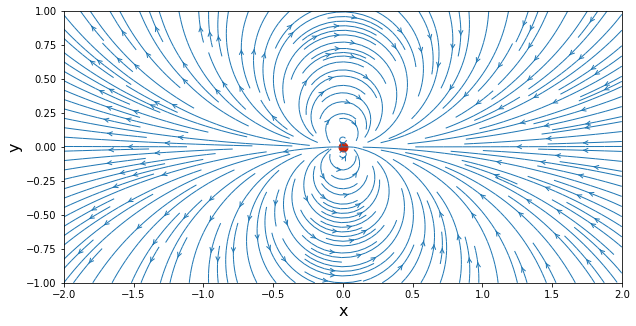

In [6]:
# рисуем линии тока
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u_doublet, v_doublet, 
               density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o');

Как мы себе и представляли, похоже на картину линий тока пары источник-сток, если смотреть на нее издали. Вы можете спросить, зачем все это? Ведь это не похоже ни на одно из течений, важных для практики? Вы ошибаетесь, если действительно так думаете.

## Диполь в равномерном потоке

Сам по себе диполь не представляет особой ценности с точки зрения решения практических задач аэродинамики. Воспользуемся нашим излюбленным приемом — суперпозицией: диполь в равномерном потоке оказывается весьма полезным классом течений. Давайте для начала зададим равномерный горизонтальный поток.

In [7]:
u_inf = 1.0        # скорость потока на бесконечности

Вспомним предыдущее занятие, в декартовых координатах вектор скорости равномерного потока имеет компоненты $u=U_\infty$ and $v=0$. Интегрируя, получим функцию тока $\psi = U_\infty y$.

Теперь можно вычислить скорости и функцию тока в каждом узле расчетной сетки. И как мы убедились, сделать это можно, написав всего по одной строчке кода на каждый массив.

In [8]:
u_freestream = u_inf * numpy.ones((N, N), dtype=float)
v_freestream = numpy.zeros((N, N), dtype=float)

psi_freestream = u_inf * Y

Ниже функция тока диполя в равномерном потоке, полученная простым сложением. Как и раньше в блокноте [Источник и сток в свободном потоке](02_Lesson02_sourceSinkFreestream.ipynb), красным цветом выделена *разделительная линия тока*.

Согласно рисунку, такая картина линий тока соответствует течению вокруг цилиндра с центром в точке расположения диполя. Все линии тока, находящиеся за пределами цилиндра приходят с бесконечности. Линии же тока внутри цилиндра можно проигнорировать, поскольку им соответствует твердое тело. Этот результат важнее, чем кажется на первый взгляд.

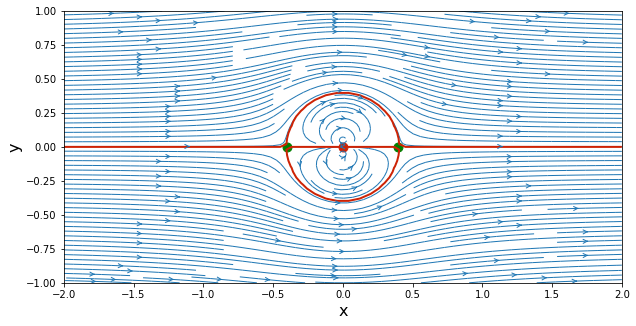

In [9]:
# наложение диполя и равномерого потока
u = u_freestream + u_doublet
v = v_freestream + v_doublet
psi = psi_freestream + psi_doublet

# рисуем линии тока
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1,\
                  arrowstyle='->')
pyplot.contour(X, Y, psi, levels=[0.], colors='#CD2305', linewidths=2,\
               linestyles='solid')
pyplot.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o')

# определяем положение точек торможения
x_stagn1, y_stagn1 = +math.sqrt(kappa/(2*math.pi*u_inf)), 0
x_stagn2, y_stagn2 = -math.sqrt(kappa/(2*math.pi*u_inf)), 0

# рисуем точки торможения
pyplot.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2], color='g',\
               s=80, marker='o');

##### Контрольный вопрос

Чему равен радиус окружности, возникающей при помещении диполя интенсивности $\kappa$ в равномерный поток со скоростью $U_\infty$, движущийся в направлении оси $x$?

##### Контрольное задание

Выше выписана функция тока диполя в цилиндрических координатах. Добавьте к ней функцию тока равномерного потока в тех же координатах и проанализируйте результат. Вы обнаружите, что $\psi=0$ в $r=a$ при любых $\theta$. Линия $\psi=0$ в цилиндрических координатах соответствует окружности радиуса $a$. Запишите компоненты скорости в цилиндрических координатах, определите скорость на поверхности цилиндра. О чем говорит этот результат?

### Уравнение Бернулли и коэффициент давления

Крайне важной характеристикой обтекания тела потоком является *коэффициент давления* $C_p$. Для оценки коэффициента давления применим *уравнение Бернулли* для несжимаемого течения, согласно которому для двух точек на линии тока справедливо

$$p_\infty + \frac{1}{2}\rho U_\infty^2 = p + \frac{1}{2}\rho U^2$$

Коэффициент давления определяется как разница давления по сравнению со значением на бесконечности, отнесенная к скоростному напору (динамическому давлению): 

$$C_p = \frac{p-p_\infty}{\frac{1}{2}\rho U_\infty^2}$$

то есть

$$C_p = 1 - \left(\frac{U}{U_\infty}\right)^2$$

Для несжимаемого течения $C_p=1$ в точке торможения . Изобразим коэффициент давления для всей расчетной области.

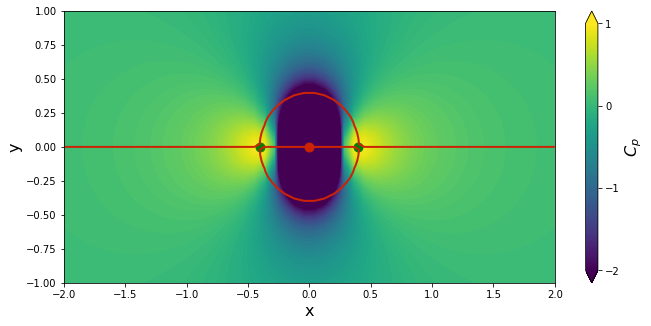

In [10]:
# вычисляем поле коэффициента давления
cp = 1.0 - (u**2+v**2)/u_inf**2

# рисуем поле коэффициента давления
size = 10
pyplot.figure(figsize=(1.1*size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(X, Y, cp, levels=numpy.linspace(-2.0, 1.0, 100),\
                        extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
pyplot.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o')
pyplot.contour(X,Y,psi, levels=[0.], colors='#CD2305', linewidths=2,\
               linestyles='solid')
pyplot.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2], color='g',\
               s=80, marker='o');

##### Контрольное задание

Покажите, что распределение коэффициента давления на поверхности круглого цилиндра записывается в виде

$$C_p = 1-4\sin^2\theta$$

и постройте график коэффициент давления от угла.

##### Вопрос для размышления

Не кажется ли вам странным, что поле коэффициента давления (как и распределение давления по поверхности) симметрично относительно вертикальной оси?

Это означает, что давление в передней части цилиндра совпадает с давлением сзади. В свою очередь это означает, что продольная компонента силы, действующей на цилиндр, равна нулю.

Однако мы знаем, что даже при низких числах Рейнольдса (ползучее течение), на тело *действует* сила сопротивления. Получается, что теория не в состоянии отразить экспериментально наблюдаемый факт! Это расхождение известно как *парадокс д'Аламбера*.

Вот как ползучее течение вокруг цилиндра *действительно * выглядит:

In [11]:
from IPython.display import YouTubeVideo
YouTubeVideo('j_d7_V2gXv0?t=28m59s')

Если вы посмотрите внимательно, то заметите небольшую асимметрию в картине течения. Можете ли вы объяснить это? Что из этого следует?

Вот довольно известная визуализация настоящего потока вокруг цилиндра при числе Рейнольдса 1,54. Это изображение было получено С. Танеда, оно представлено в «Альбоме течений жидкости и газа», Милтона Ван Дайк. Настоящий шедевр.

<center>![image](files/resources/Cylinder-Re=1dot54.png)</center>

---

In [12]:
from IPython.core.display import HTML
def css_styling():
    styles = open('../styles/custom.css', 'r').read()
    return HTML(styles)
css_styling()